# Mushroom dataset — structure and categorical mappings

This notebook loads the UCI Mushroom dataset (`agaricus-lepiota.data`), renames columns to readable feature names, maps single-letter categorical codes to descriptive strings (based on the dataset documentation), converts columns to pandas 'category' dtype, and saves a cleaned CSV for downstream analysis. All features are categorical.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

DATA_PATH = Path('agaricus-lepiota.data')
OUT_CSV = Path('mushroom_structured.csv')

# Column names in the dataset (in order) - use snake_case directly so downstream code refers to consistent names
colnames = [
    'poisonous', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
    'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape',
    'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
    'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color',
    'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat',
 ]

# Load dataset, treating '?' as NaN
df = pd.read_csv(DATA_PATH, header=None, names=colnames, na_values='?')

# Quick sanity
print('Loaded', len(df), 'rows and', len(df.columns), 'columns')
df.head(2)

Loaded 8124 rows and 23 columns


,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


## Rename columns to snake_case and create a human-readable label for the target

In [2]:
# Rename to snake_case for convenience (keep original 'poisonous' name but also create 'label')
rename_map = {
    'cap-shape': 'cap_shape',
    'cap-surface': 'cap_surface',
    'cap-color': 'cap_color',
    'gill-attachment': 'gill_attachment',
    'gill-spacing': 'gill_spacing',
    'gill-size': 'gill_size',
    'gill-color': 'gill_color',
    'stalk-shape': 'stalk_shape',
    'stalk-root': 'stalk_root',
    'stalk-surface-above-ring': 'stalk_surface_above_ring',
    'stalk-surface-below-ring': 'stalk_surface_below_ring',
    'stalk-color-above-ring': 'stalk_color_above_ring',
    'stalk-color-below-ring': 'stalk_color_below_ring',
    'veil-type': 'veil_type',
    'veil-color': 'veil_color',
    'ring-number': 'ring_number',
    'ring-type': 'ring_type',
    'spore-print-color': 'spore_print_color'
}
df = df.rename(columns=rename_map)

# Create readable label from 'poisonous' where p=poisonous, e=edible
df['label'] = df['poisonous'].map({'p': 'poisonous', 'e': 'edible'})

df.head(2)

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,label
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,poisonous
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,edible


## Mappings from single-letter codes to human-readable categories

Below are dictionaries for each attribute based on the dataset documentation. We'll keep the original coded columns and produce new columns with the suffix `_readable`.

In [3]:
mappings = {}

# Target already mapped to df['label'] but include map for completeness
mappings['poisonous'] = {'p': 'poisonous', 'e': 'edible'}

# cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
mappings['cap_shape'] = {'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'}
# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
mappings['cap_surface'] = {'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'}
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
mappings['cap_color'] = {'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'}
# bruises: bruises=t,no=f
mappings['bruises'] = {'t':'bruises','f':'no'}
# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
mappings['odor'] = {'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'}
# gill-attachment: attached=a,descending=d,free=f,notched=n
mappings['gill_attachment'] = {'a':'attached','d':'descending','f':'free','n':'notched'}
# gill-spacing: close=c,crowded=w,distant=d
mappings['gill_spacing'] = {'c':'close','w':'crowded','d':'distant'}
# gill-size: broad=b,narrow=n
mappings['gill_size'] = {'b':'broad','n':'narrow'}
# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
mappings['gill_color'] = {'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'}
# stalk-shape: enlarging=e,tapering=t
mappings['stalk_shape'] = {'e':'enlarging','t':'tapering'}
# stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=? -> NaN
mappings['stalk_root'] = {'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted'}
# stalk-surface-above-ring/below-ring: fibrous=f,scaly=y,silky=k,smooth=s
mappings['stalk_surface_above_ring'] = {'f':'fibrous','y':'scaly','k':'silky','s':'smooth'}
mappings['stalk_surface_below_ring'] = mappings['stalk_surface_above_ring']
# stalk-color-above-ring / below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
mappings['stalk_color_above_ring'] = {'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'}
mappings['stalk_color_below_ring'] = mappings['stalk_color_above_ring']
# veil-type: partial=p,universal=u
mappings['veil_type'] = {'p':'partial','u':'universal'}
# veil-color: brown=n,orange=o,white=w,yellow=y
mappings['veil_color'] = {'n':'brown','o':'orange','w':'white','y':'yellow'}
# ring-number: none=n,one=o,two=t
mappings['ring_number'] = {'n':'none','o':'one','t':'two'}
# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
mappings['ring_type'] = {'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'}
# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
mappings['spore_print_color'] = {'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'}
# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
mappings['population'] = {'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'}
# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
mappings['habitat'] = {'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}

# Check mapping keys count
len(mappings)

23

In [4]:
# Apply mappings to create new readable columns alongside raw columns
for raw_col, mapping in mappings.items():
    # Determine actual column name in df for some keys (poisonous uses original name)
    col = raw_col
    if col not in df.columns:
        # try with hyphen->underscore rename_map earlier was applied
        col = col
    readable_col = f'{col}_readable'
    # Map values; preserve NaN for missing entries (e.g., stalk_root)
    df[readable_col] = df[col].map(mapping)

# For stalk_root keep NaN where original was NaN (mapped will be NaN already)
df[['stalk_root','stalk_root_readable']].head(5)

,stalk_root,stalk_root_readable
0,e,equal
1,c,club
2,c,club
3,e,equal
4,e,equal


In [5]:
# Convert all readable columns to 'category' dtype
for c in df.columns:
    if c.endswith('_readable'):
        df[c] = df[c].astype('category')

# Also convert original coded feature columns to 'category' (they are categorical too)
for c in colnames:
    if c in df.columns:
        df[c] = df[c].astype('category')

# Show info and a sample of the mapped columns
df.info()

display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   poisonous                          8124 non-null   category
 1   cap_shape                          8124 non-null   category
 2   cap_surface                        8124 non-null   category
 3   cap_color                          8124 non-null   category
 4   bruises                            8124 non-null   category
 5   odor                               8124 non-null   category
 6   gill_attachment                    8124 non-null   category
 7   gill_spacing                       8124 non-null   category
 8   gill_size                          8124 non-null   category
 9   gill_color                         8124 non-null   category
 10  stalk_shape                        8124 non-null   category
 11  stalk_root                         5644 non

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring_readable,stalk_color_above_ring_readable,stalk_color_below_ring_readable,veil_type_readable,veil_color_readable,ring_number_readable,ring_type_readable,spore_print_color_readable,population_readable,habitat_readable
0,p,x,s,n,t,p,f,c,n,k,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,x,s,y,t,a,f,c,b,k,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,b,s,w,t,l,f,c,b,n,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,x,y,w,t,p,f,c,n,n,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,x,s,g,f,n,f,w,b,k,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,e,x,y,y,t,a,f,c,b,n,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,e,b,s,w,t,a,f,c,b,g,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
7,e,b,y,w,t,l,f,c,b,n,...,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
8,p,x,y,w,t,p,f,c,n,p,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
9,e,b,s,y,t,a,f,c,b,g,...,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


In [6]:
# Value counts for target and a couple important features
print('Target distribution:')
print(df['label'].value_counts())
print()
print('Odor distribution (readable):')
print(df['odor_readable'].value_counts())
print()
print('Gill color distribution (readable):')
print(df['gill_color_readable'].value_counts())

Target distribution:
label
edible       4208
poisonous    3916
Name: count, dtype: int64

Odor distribution (readable):
odor_readable
none        3528
foul        2160
spicy        576
fishy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: count, dtype: int64

Gill color distribution (readable):
gill_color_readable
buff         1728
pink         1492
white        1202
brown        1048
gray          752
chocolate     732
purple        492
black         408
red            96
yellow         86
orange         64
green          24
Name: count, dtype: int64


In [7]:
# Save the mapped dataframe to CSV for downstream use
df.to_csv(OUT_CSV, index=False)
print('Saved mapped CSV to', OUT_CSV)

Saved mapped CSV to mushroom_structured.csv


## Notes and next steps

- All features are categorical and have been mapped to human-readable strings.
- Missing values in `stalk_root` are preserved as NaN.
- Next: exploratory plots (countplots, stacked bars), encoding for ML (one-hot, target encoding), and a modeling pipeline (train/test split, cross-validation, tree-based models).

In [8]:
df = pd.read_csv("mushroom_structured.csv")
df

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring_readable,stalk_color_above_ring_readable,stalk_color_below_ring_readable,veil_type_readable,veil_color_readable,ring_number_readable,ring_type_readable,spore_print_color_readable,population_readable,habitat_readable
0,p,x,s,n,t,p,f,c,n,k,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,x,s,y,t,a,f,c,b,k,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,b,s,w,t,l,f,c,b,n,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,x,y,w,t,p,f,c,n,n,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,x,s,g,f,n,f,w,b,k,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,e,x,s,n,f,n,a,c,b,y,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,e,f,s,n,f,n,a,c,b,n,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,p,k,y,n,f,y,f,c,n,b,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


## Exploratory Data Analysis (EDA)
This section generates quick visualizations to understand label balance, important categorical distributions, relationships between features and the target, and missing-value patterns.\n
The plots use seaborn/matplotlib; run the cell below to produce the figures.

C:\Users\iclyd\AppData\Local\Temp\ipykernel_14988\30254543.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2', ax=ax1)
C:\Users\iclyd\AppData\Local\Temp\ipykernel_14988\30254543.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')
C:\Users\iclyd\AppData\Local\Temp\ipykernel_14988\30254543.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30, ha='right')


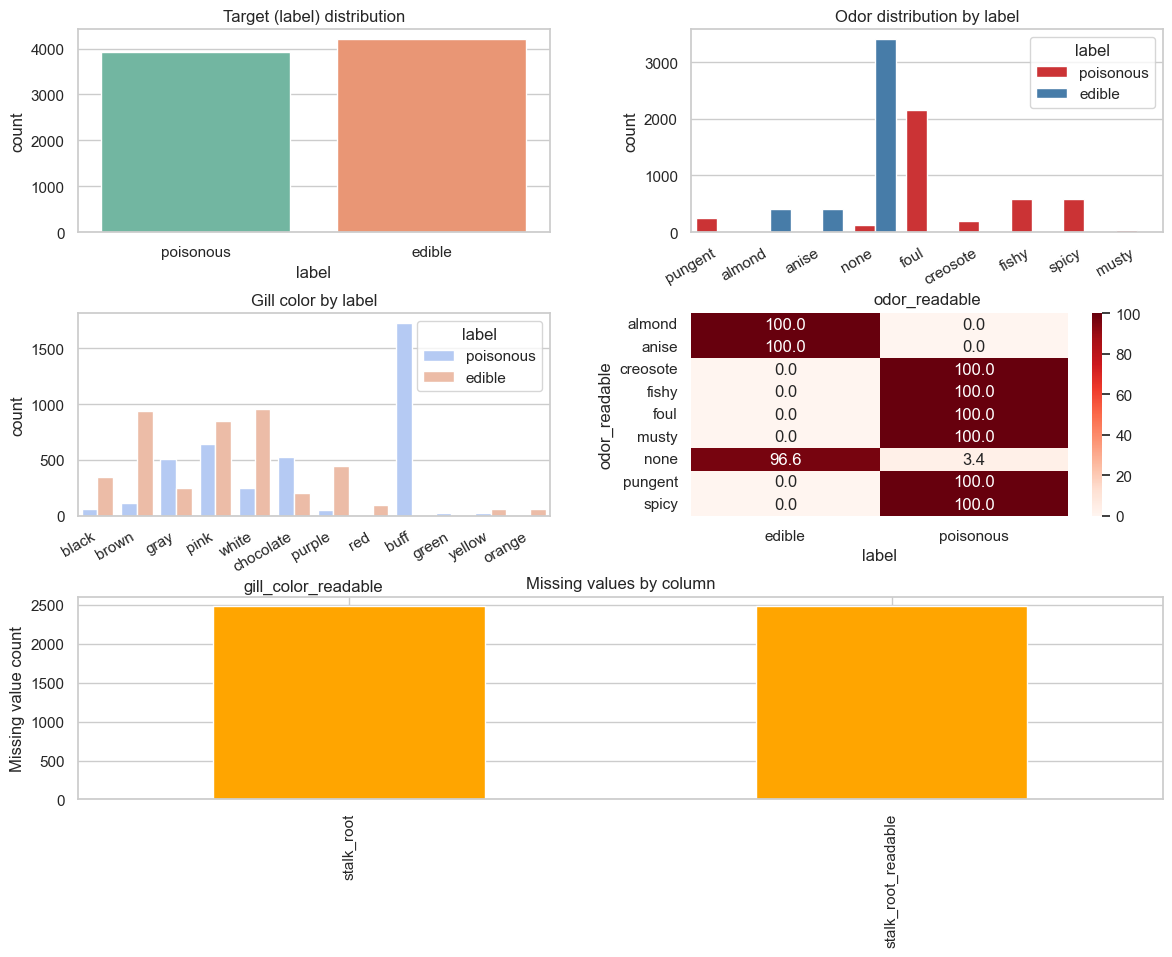


Top categorical cardinalities (number of categories):


C:\Users\iclyd\AppData\Local\Temp\ipykernel_14988\30254543.py:59: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[c]):


In [9]:
# EDA plots: label balance, odor vs label, gill color vs label, label-by-odor heatmap, missing values
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Ensure readable names exist (the notebook earlier maps these)
for col in ['label','odor_readable','gill_color_readable','stalk_root_readable']:
    if col not in df.columns:
        raise RuntimeError(f'Missing expected column: {col}')

fig = plt.figure(figsize=(14,10))
gs = fig.add_gridspec(3,2, hspace=0.4, wspace=0.3)

# 1) Target distribution
ax1 = fig.add_subplot(gs[0,0])
sns.countplot(data=df, x='label', palette='Set2', ax=ax1)
ax1.set_title('Target (label) distribution')

# 2) Odor distribution colored by label (stacked via countplot with hue)

ax2 = fig.add_subplot(gs[0,1])
sns.countplot(data=df, x='odor_readable', hue='label', palette='Set1', ax=ax2)
ax2.set_title('Odor distribution by label')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')

# 3) Gill color distribution by label (top 12 shown)

ax3 = fig.add_subplot(gs[1,0])
sns.countplot(data=df, x='gill_color_readable', hue='label', ax=ax3, palette='coolwarm')
ax3.set_title('Gill color by label')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30, ha='right')

# 4) Heatmap of proportion of poisonous by odor

pivot = (pd.crosstab(df['odor_readable'], df['label'], normalize='index') * 100).round(1)
ax4 = fig.add_subplot(gs[1,1])
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='Reds', ax=ax4)
# ax4.set_title('% by odor and label')

# 5) Missing value counts

ax5 = fig.add_subplot(gs[2,:])
missing = df.isna().sum()
missing = missing[missing>0].sort_values(ascending=False)
if len(missing)==0:
    ax5.text(0.5,0.5,'No missing values detected', ha='center', va='center')
    ax5.axis('off')
else:
    missing.plot(kind='bar', ax=ax5, color='orange')
    ax5.set_ylabel('Missing value count')
    ax5.set_title('Missing values by column')

plt.show()

# Also print top categorical cardinalities for quick reference
print('\nTop categorical cardinalities (number of categories):')
for c in df.columns:
    if pd.api.types.is_categorical_dtype(df[c]):
        print(f"{c}: {df[c].cat.categories.size}")

In [10]:
# Feature engineering: create a few robust, low-risk engineered features
# - numeric label 'label_num' (edible=0, poisonous=1)
# - boolean 'has_stalk_root'
# - frequency and target-mean (poison rate) for 'odor_readable'
# - composite / interaction features (cap_shape + cap_surface, odor+cap_color)
# - top-category indicator flags for 'gill_color_readable'
# Save result to 'mushroom_engineered.csv' for downstream modeling

from pathlib import Path

OUT_ENG = Path('mushroom_engineered.csv')

# Required readable columns (created earlier in the notebook)
required = [
    'label', 'odor_readable', 'gill_color_readable', 'stalk_root_readable',
    'cap_shape_readable', 'cap_surface_readable', 'cap_color_readable'
]
for c in required:
    if c not in df.columns:
        raise RuntimeError(f"Missing required column for feature-engineering: {c}")

# Ensure readable columns are categorical where appropriate
for c in df.columns:
    if c.endswith('_readable') or c == 'label':
        try:
            df[c] = df[c].astype('category')
        except Exception:
            # fallback: leave as-is if conversion fails
            pass

# 1) Numeric target
label_map = {'edible': 0, 'poisonous': 1}
df['label_num'] = df['label'].map(label_map).astype('Int8')
assert set(df['label_num'].dropna().unique()).issubset({0,1}), 'label_num contains unexpected values'

# 2) Presence / missing indicator for stalk_root
# (stalk_root_readable is NaN for missing roots)
df['has_stalk_root'] = (~df['stalk_root_readable'].isna()).astype('Int8')

# 3) Frequency encoding for odor (simple count) and target-mean (poison rate) by odor
# Use .fillna('MISSING') to keep missing as a category if present
odor_series = df['odor_readable'].astype('object').fillna('MISSING')
odor_counts = odor_series.map(odor_series.value_counts())
# Compute poison rate aligned to df index using groupby transform
odor_poison_rate = df.groupby(odor_series)['label_num'].transform('mean')

df['odor_freq'] = odor_counts.astype('Int32')
# poison rate could be NaN if label missing; coerce to float
df['odor_poison_rate'] = odor_poison_rate.astype('float32')

# 4) Composite / interaction features
# cap_shape + cap_surface (readable)
df['cap_shape_surface'] = (
    df['cap_shape_readable'].astype(str).fillna('NA') + '_' + df['cap_surface_readable'].astype(str).fillna('NA')
)

# odor + cap_color
df['odor_capcolor'] = (
    df['odor_readable'].astype(str).fillna('NA') + '|' + df['cap_color_readable'].astype(str).fillna('NA')
)

# 5) Top-N indicator flags for gill_color_readable (keeps memory small)
top_n = 20
top_gills = df['gill_color_readable'].value_counts().nlargest(top_n).index.tolist()
for color in top_gills:
    col_name = f'gill_is_{str(color).replace(" ","_")}'
    df[col_name] = (df['gill_color_readable'] == color).astype('Int8')

# 6) Lightweight cardinality summary (useful for feature-selection downstream)
engineered_cols = [
    'label_num', 'has_stalk_root', 'odor_freq', 'odor_poison_rate',
    'cap_shape_surface', 'odor_capcolor'
] + [f'gill_is_{str(c).replace(" ","_")}' for c in top_gills]

# Save engineered dataframe (include all original columns + engineered)
df.to_csv(OUT_ENG, index=False)

# Display quick summary
print(f"Saved engineered CSV to: {OUT_ENG} (rows={len(df)})")
print('\nSample of engineered features:')
display(df[engineered_cols].head(8))

print('\nEngineered feature cardinalities:')
for c in engineered_cols:
    if c in df.columns:
        if pd.api.types.is_numeric_dtype(df[c]):
            print(f"{c}: numeric, nulls={df[c].isna().sum()}, min={df[c].min()}, max={df[c].max()}")
        else:
            print(f"{c}: categorical-like, unique={df[c].nunique()}")

# Quick checks
if df['label_num'].isna().any():
    print('\nWarning: some rows have missing label_num')

# End of feature-engineering cell


Saved engineered CSV to: mushroom_engineered.csv (rows=8124)

Sample of engineered features:


,label_num,has_stalk_root,odor_freq,odor_poison_rate,cap_shape_surface,odor_capcolor,gill_is_buff,gill_is_pink,gill_is_white,gill_is_brown,gill_is_gray,gill_is_chocolate,gill_is_purple,gill_is_black,gill_is_red,gill_is_yellow,gill_is_orange,gill_is_green
0,1,1,256,1.000000,convex_smooth,pungent|brown,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,400,0.000000,convex_smooth,almond|yellow,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,400,0.000000,bell_smooth,anise|white,0,0,0,1,0,0,0,0,0,0,0,0
3,1,1,256,1.000000,convex_scaly,pungent|white,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,3528,0.034014,convex_smooth,none|gray,0,0,0,0,0,0,0,1,0,0,0,0
5,0,1,400,0.000000,convex_scaly,almond|yellow,0,0,0,1,0,0,0,0,0,0,0,0
6,0,1,400,0.000000,bell_smooth,almond|white,0,0,0,0,1,0,0,0,0,0,0,0
7,0,1,400,0.000000,bell_scaly,anise|white,0,0,0,1,0,0,0,0,0,0,0,0



Engineered feature cardinalities:
label_num: numeric, nulls=0, min=0, max=1
has_stalk_root: numeric, nulls=0, min=0, max=1
odor_freq: numeric, nulls=0, min=36, max=3528
odor_poison_rate: numeric, nulls=0, min=0.0, max=1.0
cap_shape_surface: categorical-like, unique=18
odor_capcolor: categorical-like, unique=34
gill_is_buff: numeric, nulls=0, min=0, max=1
gill_is_pink: numeric, nulls=0, min=0, max=1
gill_is_white: numeric, nulls=0, min=0, max=1
gill_is_brown: numeric, nulls=0, min=0, max=1
gill_is_gray: numeric, nulls=0, min=0, max=1
gill_is_chocolate: numeric, nulls=0, min=0, max=1
gill_is_purple: numeric, nulls=0, min=0, max=1
gill_is_black: numeric, nulls=0, min=0, max=1
gill_is_red: numeric, nulls=0, min=0, max=1
gill_is_yellow: numeric, nulls=0, min=0, max=1
gill_is_orange: numeric, nulls=0, min=0, max=1
gill_is_green: numeric, nulls=0, min=0, max=1


In [11]:
# Cross-validated target encoding (out-of-fold) utilities
# Computes OOF mean target for a categorical column to avoid leakage
from sklearn.model_selection import KFold

def cross_validated_target_encoding(df, col, target_col='label_num', n_splits=5, random_state=0):
    """Return a Series with out-of-fold target mean encoding for df[col].
    Missing group values are filled with global mean."""
    oof = pd.Series(index=df.index, dtype='float64')
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_idx, val_idx in kf.split(df):
        train = df.iloc[train_idx]
        # group means on training fold
        means = train.groupby(col)[target_col].mean()
        # map to validation rows and cast to numpy float64 to avoid nullable extension dtypes
        mapped = df.iloc[val_idx][col].map(means).astype('float64')
        oof.iloc[val_idx] = mapped
    # fill any remaining NaN (rare if new categories) with global mean
    global_mean = float(df[target_col].mean())
    oof.fillna(global_mean, inplace=True)
    return oof

# Apply CV target-encoding to a couple composite categorical features
te_cols = ['cap_shape_surface', 'odor_capcolor']
for c in te_cols:
    if c not in df.columns:
        raise RuntimeError(f'Missing column for target-encoding: {c}')

print('Computing cross-validated target-encoding for:', te_cols)
for c in te_cols:
    te_name = f'{c}_te'
    df[te_name] = cross_validated_target_encoding(df, c, target_col='label_num', n_splits=5, random_state=0).astype('float32')

# For completeness, compute full-dataset group mean encodings as fallback/for test use
for c in te_cols:
    full_name = f'{c}_te_full'
    df[full_name] = df.groupby(c)['label_num'].transform('mean').astype('float32')

print('Added TE columns:', [f + '_te' for f in te_cols])
# Save intermediate CSV (optional update)
df.to_csv('mushroom_engineered.csv', index=False)
print('Saved updated engineered CSV with TE columns.')

Computing cross-validated target-encoding for: ['cap_shape_surface', 'odor_capcolor']
Added TE columns: ['cap_shape_surface_te', 'odor_capcolor_te']
Saved updated engineered CSV with TE columns.
Added TE columns: ['cap_shape_surface_te', 'odor_capcolor_te']
Saved updated engineered CSV with TE columns.


In [12]:
# Small modeling example: numeric encoding + Decision Tree with CV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Select features: use numeric engineered features + target-encoded columns
model_features = [
    'odor_freq', 'odor_poison_rate', 'label_num', 'has_stalk_root',
    'cap_shape_surface_te', 'odor_capcolor_te'
]
# Ensure TE columns exist
for f in model_features:
    if f not in df.columns:
        raise RuntimeError(f'Missing expected model feature: {f}')

# Prepare X, y
X = df[[f for f in model_features if f != 'label_num']].copy()
y = df['label_num'].astype('int').copy()

# Simple train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Decision Tree and evaluate with 5-fold CV on training data
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print('CV accuracy on training set:', scores.mean(), 'std:', scores.std())

# Fit on full training data and evaluate on test set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Test set accuracy:', accuracy_score(y_test, y_pred))

# Save a small model-summary CSV with only the features used and label
MODEL_CSV = 'mushroom_model_csv.csv'
pd.concat([X, y], axis=1).to_csv(MODEL_CSV, index=False)
print('Saved modeling CSV to', MODEL_CSV)

CV accuracy on training set: 0.9949223663172855 std: 0.002260922845109431
Test set accuracy: 0.9956923076923077
Saved modeling CSV to mushroom_model_csv.csv
Saved modeling CSV to mushroom_model_csv.csv


In [13]:
# Advanced pipeline: OOF TargetEncoder (sklearn-compatible), GridSearch for RF and LightGBM, SHAP explainability
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import joblib

# Silence tqdm notebook warning if ipywidgets not installed
import warnings
try:
    from tqdm.auto import TqdmWarning
    warnings.filterwarnings('ignore', category=TqdmWarning)
except Exception:
    pass

class TargetEncoderOOF(BaseEstimator, TransformerMixin):
    """Sklearn-compatible transformer that computes out-of-fold (OOF) target-encoding for specified categorical columns during fit.
    - fit(X, y): computes OOF encoded values for rows in X using KFold and stores full-group-means for transform
    - transform(X): maps categories to full-group means and returns a plain numpy array (n_rows x n_cols)
    - Also implements get_feature_names_out for interoperability with ColumnTransformer.
    """
    def __init__(self, cols=None, n_splits=5, random_state=0):
        self.cols = cols or []
        self.n_splits = n_splits
        self.random_state = random_state
        self.full_means_ = {}
        self.oof_ = None

    def fit(self, X, y):
        # Expect X as a pandas DataFrame and y as a pandas Series or array-like
        import pandas as _pd
        from sklearn.model_selection import KFold
        if y is None:
            raise ValueError('y is required for TargetEncoderOOF.fit')
        df_local = X.copy()
        df_local['_target_'] = _pd.Series(y, index=df_local.index)
        # compute full means
        for c in self.cols:
            self.full_means_[c] = df_local.groupby(c)['_target_'].mean().to_dict()
        # compute OOF per column (kept for inspection) but not returned by transform
        oof_df = _pd.DataFrame(index=df_local.index)
        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=self.random_state)
        for c in self.cols:
            oof_series = _pd.Series(index=df_local.index, dtype='float64')
            for train_idx, val_idx in kf.split(df_local):
                train = df_local.iloc[train_idx]
                means = train.groupby(c)['_target_'].mean()
                mapped = df_local.iloc[val_idx][c].map(means).astype('float64')
                oof_series.iloc[val_idx] = mapped
            # fillna with global mean
            global_mean = float(df_local['_target_'].mean())
            oof_series.fillna(global_mean, inplace=True)
            oof_df[f'{c}_te_transform'] = oof_series
        self.oof_ = oof_df
        return self

    def transform(self, X):
        """Return a plain 2D numpy array (float32) with columns in the same order as self.cols"""
        import numpy as _np
        import pandas as _pd
        rows = []
        for c in self.cols:
            means = self.full_means_.get(c, {})
            # fallback global mean
            global_mean = float(_pd.Series(list(means.values())).mean()) if len(means) > 0 else 0.0
            col = X[c].map(means).fillna(global_mean).astype('float32')
            rows.append(col.values)
        if len(rows) == 0:
            return _np.zeros((len(X), 0), dtype='float32')
        arr = _np.vstack(rows).T.astype('float32')
        return arr

    def get_feature_names_out(self, input_features=None):
        return [f'{c}_te_transform' for c in self.cols]

# Features
cat_for_te = ['cap_shape_surface', 'odor_capcolor']
num_features = ['odor_freq', 'odor_poison_rate', 'has_stalk_root']

# Preprocessor: OOF TE for categorical columns, scale numeric columns
preprocessor = ColumnTransformer([
    ('te', TargetEncoderOOF(cols=cat_for_te, n_splits=5, random_state=0), cat_for_te),
    ('num', StandardScaler(), num_features)
], remainder='drop')

# Pipeline placeholder (classifier replaced in GridSearch)
pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

# Prepare data
X = df[cat_for_te + num_features].copy()
y = df['label_num'].astype('int').copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Grid search for RandomForest (concise output)
param_grid_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [6, 10]
}

gs_rf = GridSearchCV(pipe, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
print('Running GridSearchCV for RandomForest...')
gs_rf.fit(X_train, y_train)
rf_best_score = gs_rf.best_score_
rf_best_params = gs_rf.best_params_
print(f"RF best CV: {rf_best_score:.5f}, params: {rf_best_params}")

best_model = gs_rf.best_estimator_


# Evaluate best model on test set (concise)
from sklearn.metrics import accuracy_score, classification_report
pred = best_model.predict(X_test)
print('Test accuracy (best model):', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

# SHAP explainability: robustly handle list/3D/2D outputs and reduce to 2D class-level shap values
try:
    import shap
    import numpy as _np
    import matplotlib.pyplot as plt
    # get transformed test data to feed to the classifier
    X_test_transformed = best_model.named_steps['pre'].transform(X_test)
    # Coerce to 2D numpy array then to DataFrame with explicit column names
    Xt = _np.asarray(X_test_transformed, dtype=float)
    featurenames = [f'{c}_te_transform' for c in cat_for_te] + num_features
    if Xt.ndim != 2:
        raise ValueError(f'Transformed data ndim={Xt.ndim}, expected 2')
    if Xt.shape[1] != len(featurenames):
        raise ValueError(f'Transformed data has {Xt.shape[1]} cols, expected {len(featurenames)}')
    Xdf = pd.DataFrame(Xt, columns=featurenames)
    clf_step = best_model.named_steps['clf']
    
    explainer = shap.TreeExplainer(clf_step)
    shap_values = explainer.shap_values(Xdf)
    
    # Normalize shap_values to a 2D array sv (n_samples, n_features) representing the class of interest
    sv = None
    if isinstance(shap_values, list):
        # list of arrays, each usually (n_samples, n_features)
        sv = shap_values[1] if len(shap_values) > 1 else shap_values[0]
    else:
        # shap_values may be numpy array with shape (n_samples, n_features, n_classes)
        shap_arr = _np.asarray(shap_values)
        if shap_arr.ndim == 2:
            sv = shap_arr
        elif shap_arr.ndim == 3:
            # try common shapes:
            # (n_samples, n_features, n_classes) -> pick last class
            if shap_arr.shape[0] == Xdf.shape[0] and shap_arr.shape[1] == Xdf.shape[1]:
                sv = shap_arr[:, :, -1]
            # (n_classes, n_samples, n_features) -> pick last class and transpose
            elif shap_arr.shape[0] != Xdf.shape[0] and shap_arr.shape[1] == Xdf.shape[0] and shap_arr.shape[2] == Xdf.shape[1]:
                sv = shap_arr[-1, :, :]
            else:
                # fallback: sum over class axis (gives combined effect) or pick last
                sv = shap_arr[..., -1]
        else:
            raise ValueError(f'unexpected shap_values ndim={shap_arr.ndim}')
    sv = _np.asarray(sv, dtype=float)
    if sv.shape != Xdf.shape:
        # try transpose if shapes align
        if sv.T.shape == Xdf.shape:
            sv = sv.T
        else:
            raise ValueError(f'SHAP values shape {sv.shape} does not match feature data shape {Xdf.shape}')
    imp_df = pd.DataFrame({'feature': Xdf.columns, 'mean_abs_shap': _np.abs(sv).mean(axis=0)})
    imp_df = imp_df.sort_values('mean_abs_shap', ascending=False)
    print('\nSHAP mean absolute importance:')
    print(imp_df.to_string(index=False))
    # Save a compact summary plot
    plt.figure(figsize=(8,6))
    shap.summary_plot(sv, Xdf, feature_names=Xdf.columns, show=False)
    plt.tight_layout()
    plt.savefig('shap_summary.png', dpi=150)
    plt.close()
    print('Saved SHAP summary plot to shap_summary.png')
except Exception as e:
    # concise diagnostic message once
    print('SHAP not available or failed to compute:', str(e))

# Save best model
MODEL_PATH = 'best_mushroom_model_oof.joblib'
joblib.dump(best_model, MODEL_PATH)
print('Saved best model to', MODEL_PATH)

# Small prediction example using saved model
loaded = joblib.load(MODEL_PATH)
sample = X_test.iloc[[0]].copy()
print('Sample input:', sample.to_dict(orient='records'))
print('Predicted label (0=edible,1=poisonous):', int(loaded.predict(sample)[0]))

# Save pipeline CSV
pd.concat([X, y], axis=1).to_csv('mushroom_model_pipeline_csv.csv', index=False)
print('Saved pipeline CSV.')

Running GridSearchCV for RandomForest...


c:\Users\iclyd\anaconda3\envs\vqe\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


RF best CV: 0.99723, params: {'clf__max_depth': 10, 'clf__n_estimators': 100}
Test accuracy (best model): 0.9987692307692307
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


SHAP mean absolute importance:
                       feature  mean_abs_shap
    odor_capcolor_te_transform       0.283753
              odor_poison_rate       0.150225
                     odor_freq       0.055537
                has_stalk_root       0.014517
cap_shape_surface_te_transform       0.014420
Saved SHAP summary plot to shap_summary.png
Saved best model to best_mushroom_model_oof.joblib

SHAP mean absolute importance:
                       feature  mean_abs_shap
    odor_capcolor_te_transform       0.283753
              odor_po

In [14]:
# Visualization utilities: feature importances, SHAP summary/dependence, and a couple saved EDA plots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as _np
sns.set(style='whitegrid')


def save_fig(fig, path, dpi=150):
    fig.tight_layout()
    fig.savefig(path, dpi=dpi)
    plt.close(fig)


def get_preprocessor_feature_names(pre, fallback_cols):
    """Try several strategies to build feature names that match pre.transform() output.
    Returns a list of names with length equal to the number of columns produced by pre.transform
    when possible; otherwise returns fallback_cols or generated placeholders.
    """
    # 1) direct API
    try:
        names = list(pre.get_feature_names_out())
        if len(names) > 0:
            return names
    except Exception:
        pass

    names = []
    # 2) inspect transformers_ (works for ColumnTransformer)
    for item in getattr(pre, 'transformers_', []):
        # item is (name, transformer, columns)
        try:
            name, transformer, cols = item
        except Exception:
            continue
        # skip dropped
        if transformer == 'drop':
            continue
        if name == 'remainder' and transformer == 'drop':
            continue
        # passthrough remainder
        if name == 'remainder' and transformer == 'passthrough':
            if isinstance(cols, (list, tuple)):
                names.extend(list(cols))
            continue
        # try transformer.get_feature_names_out
        try:
            if hasattr(transformer, 'get_feature_names_out'):
                try:
                    out = list(transformer.get_feature_names_out(cols))
                except Exception:
                    out = list(transformer.get_feature_names_out())
            else:
                # heuristics for custom TargetEncoder-like transformer
                if hasattr(transformer, 'cols') or name.startswith('te') or name == 'te':
                    cols_list = cols if isinstance(cols, (list, tuple)) else [cols]
                    out = [f"{c}_te_transform" for c in cols_list]
                else:
                    out = list(cols) if isinstance(cols, (list, tuple)) else [cols]
        except Exception:
            out = list(cols) if isinstance(cols, (list, tuple)) else [cols]
        names.extend(out)

    if len(names) > 0:
        return names

    # 3) fallback
    if fallback_cols is not None:
        return fallback_cols
    return []


# 1) Simple EDA figures saved to disk (odor vs label count; odor -> poison% heatmap)
try:
    fig1, ax1 = plt.subplots(figsize=(8,4))
    sns.countplot(data=df, x='odor_readable', hue='label', palette='Set1', ax=ax1)
    ax1.set_title('Odor distribution by label')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
    save_fig(fig1, 'eda_odor_by_label.png')
    print('Saved EDA plot: eda_odor_by_label.png')
    # heatmap of % poisonous by odor
    pivot = (pd.crosstab(df['odor_readable'], df['label'], normalize='index') * 100).round(1)
    fig2, ax2 = plt.subplots(figsize=(6,6))
    sns.heatmap(pivot, annot=True, fmt='.1f', cmap='Reds', ax=ax2)
    ax2.set_title('% by odor and label')
    save_fig(fig2, 'eda_odor_poison_rate.png')
    print('Saved EDA plot: eda_odor_poison_rate.png')
except Exception as e:
    print('EDA plots failed:', e)


# 2) Feature importances from the trained tree classifier (if available)
try:
    if 'best_model' in globals():
        clf_step = best_model.named_steps['clf']
        pre = best_model.named_steps['pre']
        # Preferred fallback columns list
        fallback = [f"{c}_te_transform" for c in cat_for_te] + num_features
        featurenames = get_preprocessor_feature_names(pre, fallback)
        # get transformed X (use a sample if large)
        X_for_import = X_test.copy() if 'X_test' in globals() else df.iloc[:200].copy()
        Xt = pre.transform(X_for_import)
        Xt = _np.asarray(Xt, dtype=float)
        # ensure featurenames length matches transformed columns; if not, generate placeholder names
        if len(featurenames) != Xt.shape[1]:
            featurenames = [f'feature_{i}' for i in range(Xt.shape[1])]
        # use native tree feature_importances_ when present
        if hasattr(clf_step, 'feature_importances_'):
            imp = clf_step.feature_importances_
            if imp.sum() == 0:
                raise RuntimeError('feature_importances_ are all zeros')
            imp_df_local = pd.DataFrame({'feature': featurenames, 'importance': imp}).sort_values('importance', ascending=False)
            fig3, ax3 = plt.subplots(figsize=(8,4))
            sns.barplot(data=imp_df_local, x='importance', y='feature', ax=ax3, palette='viridis')
            ax3.set_title('Model feature importances (tree)')
            save_fig(fig3, 'model_feature_importances.png')
            print('Saved model feature importances: model_feature_importances.png')
        else:
            print('Classifier has no attribute feature_importances_. Skipping tree importances.')
    else:
        print('best_model not found in globals(); skipping model importances.')
except Exception as e:
    print('Feature importance plotting failed:', e)


# 3) SHAP-based plots (summary + a couple of dependence plots) - sample for speed and be robust to shapes
try:
    import shap
    if 'best_model' in globals():
        clf_step = best_model.named_steps['clf']
        pre = best_model.named_steps['pre']
        sample_idx = list(range(min(200, len(X_test)))) if 'X_test' in globals() else list(range(min(200, len(df))))
        X_sample = X_test.iloc[sample_idx].copy() if 'X_test' in globals() else df.iloc[sample_idx][cat_for_te + num_features].copy()
        Xt_sample = pre.transform(X_sample)
        Xt_sample = _np.asarray(Xt_sample, dtype=float)
        # build featurenames for sample transform
        fallback = [f"{c}_te_transform" for c in cat_for_te] + num_features
        featurenames = get_preprocessor_feature_names(pre, fallback)
        if len(featurenames) != Xt_sample.shape[1]:
            featurenames = [f'feature_{i}' for i in range(Xt_sample.shape[1])]
        Xdf = pd.DataFrame(Xt_sample, columns=featurenames)
        explainer = shap.TreeExplainer(clf_step)
        shap_values = explainer.shap_values(Xdf)
        # normalize to 2D as earlier in notebook
        sv = None
        if isinstance(shap_values, list):
            sv = shap_values[1] if len(shap_values) > 1 else shap_values[0]
        else:
            shap_arr = _np.asarray(shap_values)
            if shap_arr.ndim == 2:
                sv = shap_arr
            elif shap_arr.ndim == 3:
                if shap_arr.shape[0] == Xdf.shape[0] and shap_arr.shape[1] == Xdf.shape[1]:
                    sv = shap_arr[:, :, -1]
                elif shap_arr.shape[1] == Xdf.shape[0] and shap_arr.shape[2] == Xdf.shape[1]:
                    sv = shap_arr[-1, :, :]
                else:
                    sv = shap_arr[..., -1]
            else:
                raise ValueError(f'unexpected shap_values ndim={shap_arr.ndim}')
        sv = _np.asarray(sv, dtype=float)
        if sv.shape != Xdf.shape:
            if sv.T.shape == Xdf.shape:
                sv = sv.T
            else:
                raise ValueError(f'SHAP values shape {sv.shape} does not match feature data shape {Xdf.shape}')
        # summary plot (save as PNG)
        plt.figure(figsize=(8,6))
        shap.summary_plot(sv, Xdf, feature_names=Xdf.columns, show=False)
        plt.tight_layout()
        plt.savefig('shap_summary_auto.png', dpi=150)
        plt.close()
        print('Saved SHAP summary: shap_summary_auto.png')
        # dependence plots for top 3 features by mean abs shap
        mean_abs = _np.abs(sv).mean(axis=0)
        top_idx = _np.argsort(mean_abs)[-3:][::-1]
        for i in top_idx:
            fname = Xdf.columns[i]
            try:
                plt.figure(figsize=(6,4))
                shap.dependence_plot(fname, sv, Xdf, show=False)
                plt.tight_layout()
                # sanitize filename
                safe = fname.replace(' ', '_')
                plt.savefig(f'shap_dependence_{safe}.png', dpi=150)
                plt.close()
                print(f'Saved SHAP dependence plot: shap_dependence_{safe}.png')
            except Exception as e:
                print('Dependence plot failed for', fname, e)
    else:
        print('best_model not found; skipping SHAP plots')
except Exception as e:
    print('SHAP plotting skipped or failed:', e)

print('Visualization step complete. Files saved (if successful): eda_odor_by_label.png, eda_odor_poison_rate.png, model_feature_importances.png, shap_summary_auto.png, shap_dependence_*.png')


Saved EDA plot: eda_odor_by_label.png


C:\Users\iclyd\AppData\Local\Temp\ipykernel_14988\2323673514.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
C:\Users\iclyd\AppData\Local\Temp\ipykernel_14988\2323673514.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df_local, x='importance', y='feature', ax=ax3, palette='viridis')


Saved EDA plot: eda_odor_poison_rate.png
Saved model feature importances: model_feature_importances.png
Saved SHAP summary: shap_summary_auto.png
Saved SHAP dependence plot: shap_dependence_te__odor_capcolor_te_transform.png
Saved SHAP summary: shap_summary_auto.png
Saved SHAP dependence plot: shap_dependence_te__odor_capcolor_te_transform.png
Saved SHAP dependence plot: shap_dependence_num__odor_poison_rate.png
Saved SHAP dependence plot: shap_dependence_num__odor_freq.png
Visualization step complete. Files saved (if successful): eda_odor_by_label.png, eda_odor_poison_rate.png, model_feature_importances.png, shap_summary_auto.png, shap_dependence_*.png
Saved SHAP dependence plot: shap_dependence_num__odor_poison_rate.png
Saved SHAP dependence plot: shap_dependence_num__odor_freq.png
Visualization step complete. Files saved (if successful): eda_odor_by_label.png, eda_odor_poison_rate.png, model_feature_importances.png, shap_summary_auto.png, shap_dependence_*.png


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

Loaded model from best_mushroom_model_oof.joblib
Pearson r: 0.9963 | R^2: 0.9927 | RMSE: 0.0428 | MAE: 0.0041 | Acc: 0.9979 | AUC: 0.9999667446024305 | AP: 0.999950356409698


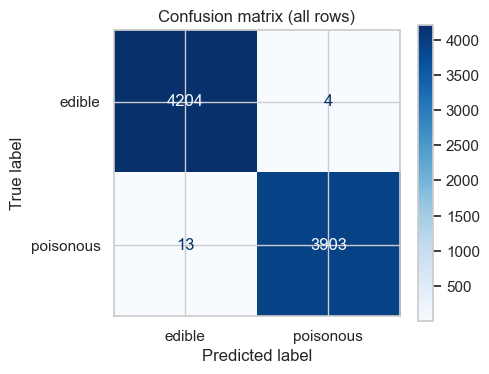

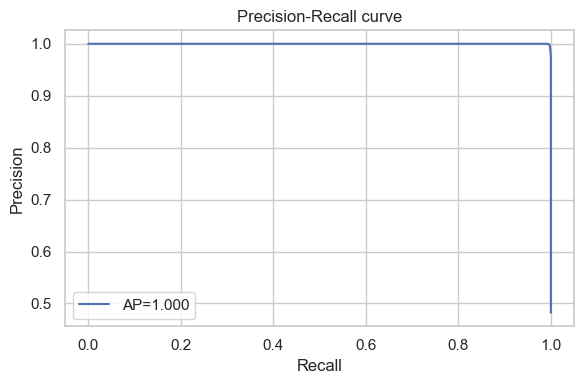

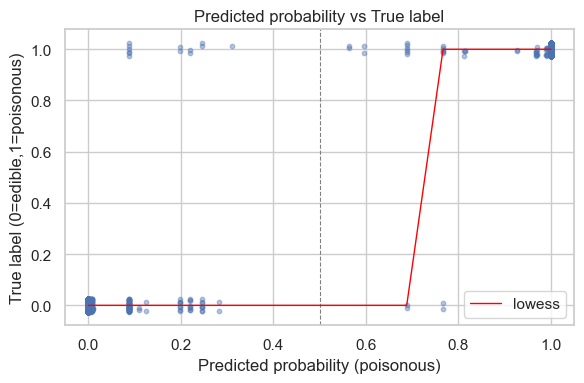

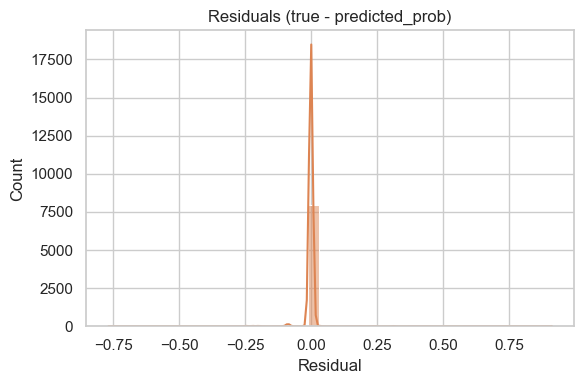

Calibration step failed or skipped: CalibratedClassifierCV.__init__() got an unexpected keyword argument 'base_estimator'
Saved predictions_vs_true.csv and plots: pred_vs_true_scatter.png, pred_residuals_hist.png, confusion_matrix.png, pr_curve.png, calibration_comparison.png (if created)


In [15]:
# Prediction vs ground-truth diagnostics: Pearson r, R^2, RMSE, confusion matrix, PR-curve, calibration comparison
# Load libs
import os, joblib
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
sns.set(style='whitegrid')
warnings.filterwarnings('ignore')
# 1) locate/load model
model = None
for p in ['best_mushroom_model_oof.joblib', 'best_mushroom_model.joblib']:
    if os.path.exists(p):
        try:
            model = joblib.load(p)
            print('Loaded model from', p)
            break
        except Exception as e:
            print('Failed to load', p, '->', e)
if model is None and 'best_model' in globals():
    model = best_model
    print('Using `best_model` from notebook globals')
if model is None:
    raise RuntimeError('No model available: save/load `best_mushroom_model_oof.joblib` or ensure `best_model` is in-memory')
# 2) prepare feature matrix X_all (try existing X, else reconstruct from documented cat_for_te/num_features)
if 'X' in globals():
    X_all = X.copy()
else:
    cols = []
    if 'cat_for_te' in globals():
        cols += list(cat_for_te)
    if 'num_features' in globals():
        cols += list(num_features)
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise RuntimeError(f'Missing columns required to build model input: {missing}')
    X_all = df[cols].copy()
# Ensure we have a train/test split available; if not, create one for calibration fitting
if 'X_train' not in globals() or 'y_train' not in globals():
    X_train, X_test, y_train, y_test = train_test_split(X_all, df['label_num'].astype(int), test_size=0.2, random_state=42, stratify=df['label_num'])
# 3) true target (float for continuous metrics)
y_true = df['label_num'].astype(float).values
# 4) predicted probability (preferred) or fallback to predicted label
try:
    y_pred_prob = model.predict_proba(X_all)[:, 1]
    y_pred = (y_pred_prob >= 0.5).astype(int)
except Exception:
    # some estimators may not have predict_proba; fall back to predict
    y_pred = model.predict(X_all).astype(int)
    y_pred_prob = y_pred.astype(float)
# 5) metrics
pearson_r = np.corrcoef(y_true, y_pred_prob)[0, 1]
r2 = r2_score(y_true, y_pred_prob)
mse = mean_squared_error(y_true, y_pred_prob)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred_prob)
acc = accuracy_score(y_true.astype(int), y_pred)
auc = None
try:
    auc = roc_auc_score(y_true, y_pred_prob)
except Exception:
    auc = None
ap = None
try:
    ap = average_precision_score(y_true, y_pred_prob)
except Exception:
    ap = None
print(f'Pearson r: {pearson_r:.4f} | R^2: {r2:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | Acc: {acc:.4f} | AUC: {auc if auc is not None else "no AUC"} | AP: {ap if ap is not None else "no AP"}')
# 6) confusion matrix
cm = confusion_matrix(y_true.astype(int), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['edible','poisonous'])
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion matrix (all rows)')
plt.tight_layout()
fig.savefig('confusion_matrix.png', dpi=150)
plt.show()
# 7) PR-curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
avg_prec = average_precision_score(y_true, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'AP={avg_prec:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('pr_curve.png', dpi=150)
plt.show()
# 8) scatter plot: predicted probability vs true label (jitter true for visualization)
plt.figure(figsize=(6, 4))
jitter = (np.random.rand(len(y_true)) - 0.5) * 0.05
plt.scatter(y_pred_prob, y_true + jitter, alpha=0.4, s=10)
plt.xlabel('Predicted probability (poisonous)')
plt.ylabel('True label (0=edible,1=poisonous)')
plt.title('Predicted probability vs True label')
plt.axvline(0.5, color='gray', linestyle='--', linewidth=0.8)
# Add a lowess-like trend if statsmodels available, else plot median per bin
try:
    from statsmodels.nonparametric.smoothers_lowess import lowess
    lo = lowess(y_true, y_pred_prob, frac=0.2)
    plt.plot(lo[:, 0], lo[:, 1], color='red', linewidth=1.0, label='lowess')
except Exception:
    bins = np.linspace(0, 1, 11)
    bin_idx = np.digitize(y_pred_prob, bins) - 1
    med = [np.median(y_true[bin_idx == i]) if np.any(bin_idx == i) else np.nan for i in range(len(bins))]
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, med[:-1], color='red', linewidth=1.0, label='binned median')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('pred_vs_true_scatter.png', dpi=150)
plt.show()
# 9) residuals histogram (true - pred_prob)
residuals = y_true - y_pred_prob
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=40, kde=True, color='C1')
plt.title('Residuals (true - predicted_prob)')
plt.xlabel('Residual')
plt.tight_layout()
plt.savefig('pred_residuals_hist.png', dpi=150)
plt.show()
# 10) calibration: fit calibrated classifier on training data and compare
try:
    # Build a calibrated pipeline using the preprocessor from the saved best model if available
    from sklearn.pipeline import Pipeline
    if hasattr(model, 'named_steps') and 'pre' in model.named_steps and 'clf' in model.named_steps:
        pre = model.named_steps['pre']
        base_clf = model.named_steps['clf']
        calib_clf = CalibratedClassifierCV(base_estimator=base_clf, cv=5)
        calib_pipe = Pipeline([('pre', pre), ('clf', calib_clf)])
        # fit calibrated classifier on training split (preprocessor inside pipeline will be used)
        print('Fitting CalibratedClassifierCV on training data (may take a moment)...')
        calib_pipe.fit(X_train, y_train)
        y_pred_prob_cal = calib_pipe.predict_proba(X_all)[:, 1]
        # calibration curves for both models
        prob_true_orig, prob_pred_orig = calibration_curve(y_true, y_pred_prob, n_bins=10)
        prob_true_cal, prob_pred_cal = calibration_curve(y_true, y_pred_prob_cal, n_bins=10)
        plt.figure(figsize=(6,5))
        plt.plot(prob_pred_orig, prob_true_orig, marker='o', label='original')
        plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='calibrated')
        plt.plot([0,1],[0,1], linestyle='--', color='gray')
        plt.xlabel('Mean predicted probability')
        plt.ylabel('Fraction of positives')
        plt.title('Calibration: original vs calibrated')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.savefig('calibration_comparison.png', dpi=150)
        plt.show()
    else:
        print('Model is not a pipeline with named_steps pre/clf; skipping calibrated classifier fit')
except Exception as e:
    print('Calibration step failed or skipped:', e)
# 11) save numeric results for downstream inspection
out_df = pd.DataFrame({'y_true': y_true, 'y_pred_prob': y_pred_prob, 'y_pred': y_pred})
out_df.to_csv('predictions_vs_true.csv', index=False)
print('Saved predictions_vs_true.csv and plots: pred_vs_true_scatter.png, pred_residuals_hist.png, confusion_matrix.png, pr_curve.png, calibration_comparison.png (if created)')